In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

## Getting the data

Reading data with sentiment analysis

In [103]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
#gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

In [116]:
#Adding year column
gw_sent['year']=gw_sent['date'].apply(lambda x: x.split('-')[0])
ab_sent['year']=ab_sent['date'].apply(lambda x: x.split('-')[0])
gi_sent['year']=gi_sent['date'].apply(lambda x: x.split('-')[0])
#gc_sent['year']=gc_sent['date'].apply(lambda x: x.split('-')[0])

Reading data with speakers attributes

In [9]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
#gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
#gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

## Analysis over the data

###### Global warming

In [64]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year
Unnamed: 0,,,,,,,,,,
321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650,2018
828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901,2018
936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000,2018
1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956,2018
1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263,2018


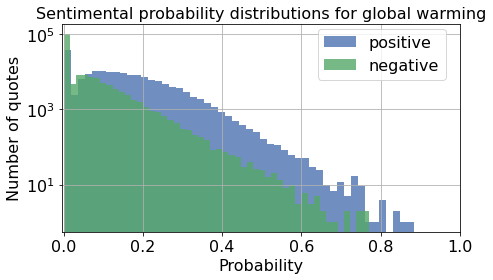

In [46]:
# Plotting Positive and Negative Probability Distributions
mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['positive scores'],label='positive', bins = 50, alpha=0.8)
plt.hist(gw_sent['negative scores'],label='negative', bins = 50, alpha=0.8)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental probability distributions for global warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

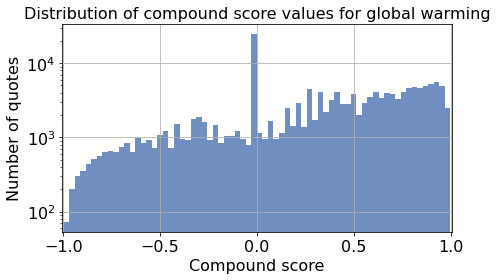

In [48]:
# Plotting the Compound Scores

mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of compound score values for global warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [92]:
positive=gw_sent[gw_sent['compound scores']>=0.05]
negative=gw_sent[gw_sent['compound scores']<=-0.05]
neutral=gw_sent[np.abs(gw_sent['compound scores'])<0.05]

In [93]:
neutral.describe()

,positive scores,negative scores,compound scores
count,26380.000000,26380.000000,26380.000000
mean,0.010279,0.009411,0.000332
std,0.033114,0.031387,0.008413
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.388000,0.324000,0.049800


In [94]:
positive.describe()

,positive scores,negative scores,compound scores
count,110164.000000,110164.000000,110164.000000
mean,0.185977,0.018335,0.601341
std,0.095838,0.034598,0.258020
min,0.014000,0.000000,0.050000
25%,0.114000,0.000000,0.381800
50%,0.171000,0.000000,0.636900
75%,0.241000,0.029000,0.831600
max,0.884000,0.343000,0.998800


In [95]:
negative.describe()

,positive scores,negative scores,compound scores
count,29821.000000,29821.000000,29821.000000
mean,0.042987,0.146590,-0.423574
std,0.050780,0.081922,0.236398
min,0.000000,0.012000,-0.998500
25%,0.000000,0.088000,-0.599400
50%,0.031000,0.129000,-0.381800
75%,0.075000,0.185000,-0.249800
max,0.419000,0.770000,-0.050000


In [96]:
# print total number of positive, negative and neutral quotes
print('Number of positive sent: ', positive.size)
print('Number of negative sent: ', negative.size)
print('Number of neutral sent: ', neutral.size)

Number of positive sent:  1101640
Number of negative sent:  298210
Number of neutral sent:  263800


In [97]:
#TODO: Compare positive,neutral,negative by vizualization


###### Abortion


In [69]:
ab_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year
Unnamed: 0,,,,,,,,,,
1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '...",0.064,0.104,-0.5719,2015
1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",0.169,0.065,0.8350,2015
1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",0.124,0.000,0.6249,2015
1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]",0.000,0.000,0.0000,2015
1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",0.092,0.249,-0.6486,2015


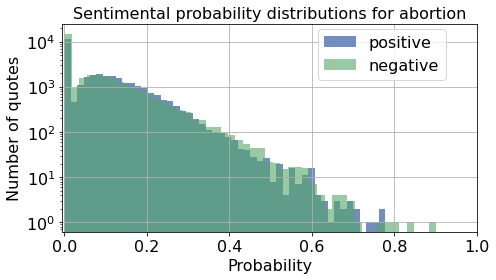

In [74]:
# Plotting Positive and Negative Probability Distributions
mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['positive scores'],label='positive', bins = 50, alpha=0.8)
plt.hist(ab_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental probability distributions for abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

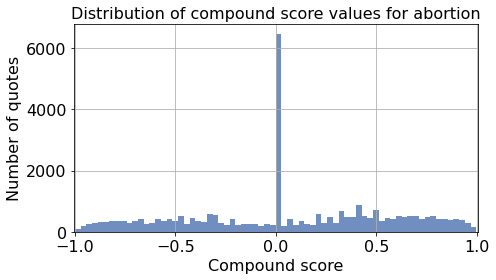

In [86]:
# Plotting the Compound Scores

mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of compound score values for abortion', fontsize = 16)
plt.grid()
#ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [87]:
positive=ab_sent[ab_sent['compound scores']>=0.05]
negative=ab_sent[ab_sent['compound scores']<=-0.05]
neutral=ab_sent[np.abs(ab_sent['compound scores'])< 0.05]

In [88]:
neutral.describe()

,positive scores,negative scores,compound scores
count,6801.000000,6801.000000,6801.000000
mean,0.010469,0.009852,0.000155
std,0.035739,0.034280,0.008437
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.358000,0.344000,0.049800


In [89]:
positive.describe()

,positive scores,negative scores,compound scores
count,14568.000000,14568.000000,14568.000000
mean,0.169490,0.031016,0.519866
std,0.091705,0.045643,0.249167
min,0.013000,0.000000,0.050000
25%,0.103750,0.000000,0.328375
50%,0.153000,0.000000,0.510600
75%,0.216000,0.058000,0.726900
max,0.778000,0.413000,0.996900


In [90]:
negative.describe()

,positive scores,negative scores,compound scores
count,10997.000000,10997.000000,10997.000000
mean,0.041669,0.178907,-0.507684
std,0.052215,0.100372,0.251306
min,0.000000,0.012000,-0.998700
25%,0.000000,0.107000,-0.718400
50%,0.000000,0.158000,-0.497600
75%,0.075000,0.227000,-0.296000
max,0.338000,0.902000,-0.050700


In [91]:
# print total number of positive, negative and neutral quotes
print('Number of positive sent: ', positive.size)
print('Number of negative sent: ', negative.size)
print('Number of neutral sent: ', neutral.size)

Number of positive sent:  145680
Number of negative sent:  109970
Number of neutral sent:  68010


###### Gender Inequality

In [105]:
gi_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
Unnamed: 0,,,,,,,,,
3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717
3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000
3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144
3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000
3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000


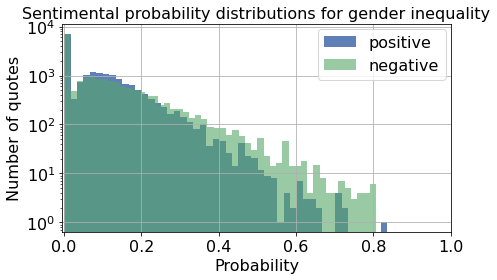

In [107]:
# Plotting Positive and Negative Probability Distributions
mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental probability distributions for gender inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

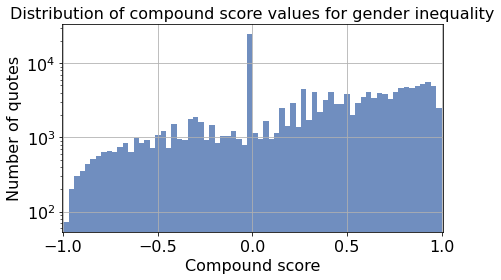

In [108]:
# Plotting the Compound Scores

mpl.style.use('seaborn-deep')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of compound score values for gender inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [109]:
positive=gi_sent[gi_sent['compound scores']>=0.05]
negative=gi_sent[gi_sent['compound scores']<=-0.05]
neutral=gi_sent[np.abs(gi_sent['compound scores'])< 0.05]

In [110]:
neutral.describe()

,positive scores,negative scores,compound scores
count,3517.000000,3517.000000,3517.000000
mean,0.011697,0.011513,-0.000066
std,0.038019,0.037379,0.008379
min,0.000000,0.000000,-0.049500
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.321000,0.347000,0.049800


In [111]:
positive.describe()

,positive scores,negative scores,compound scores
count,7446.000000,7446.000000,7446.000000
mean,0.172090,0.035557,0.534376
std,0.096399,0.048044,0.257406
min,0.018000,0.000000,0.050000
25%,0.103000,0.000000,0.340000
50%,0.151000,0.000000,0.526700
75%,0.219000,0.063000,0.757900
max,0.835000,0.333000,0.994500


In [112]:
negative.describe()

,positive scores,negative scores,compound scores
count,7633.000000,7633.000000,7633.000000
mean,0.042135,0.209286,-0.548477
std,0.054168,0.123466,0.260222
min,0.000000,0.017000,-0.995900
25%,0.000000,0.121000,-0.770300
50%,0.000000,0.181000,-0.571900
75%,0.077000,0.267000,-0.340000
max,0.347000,0.806000,-0.051600


In [113]:
# print total number of positive, negative and neutral quotes
print('Number of positive sent: ', positive.size)
print('Number of negative sent: ', negative.size)
print('Number of neutral sent: ', neutral.size)

Number of positive sent:  67014
Number of negative sent:  68697
Number of neutral sent:  31653


## Analysis over the years

###### Global warming

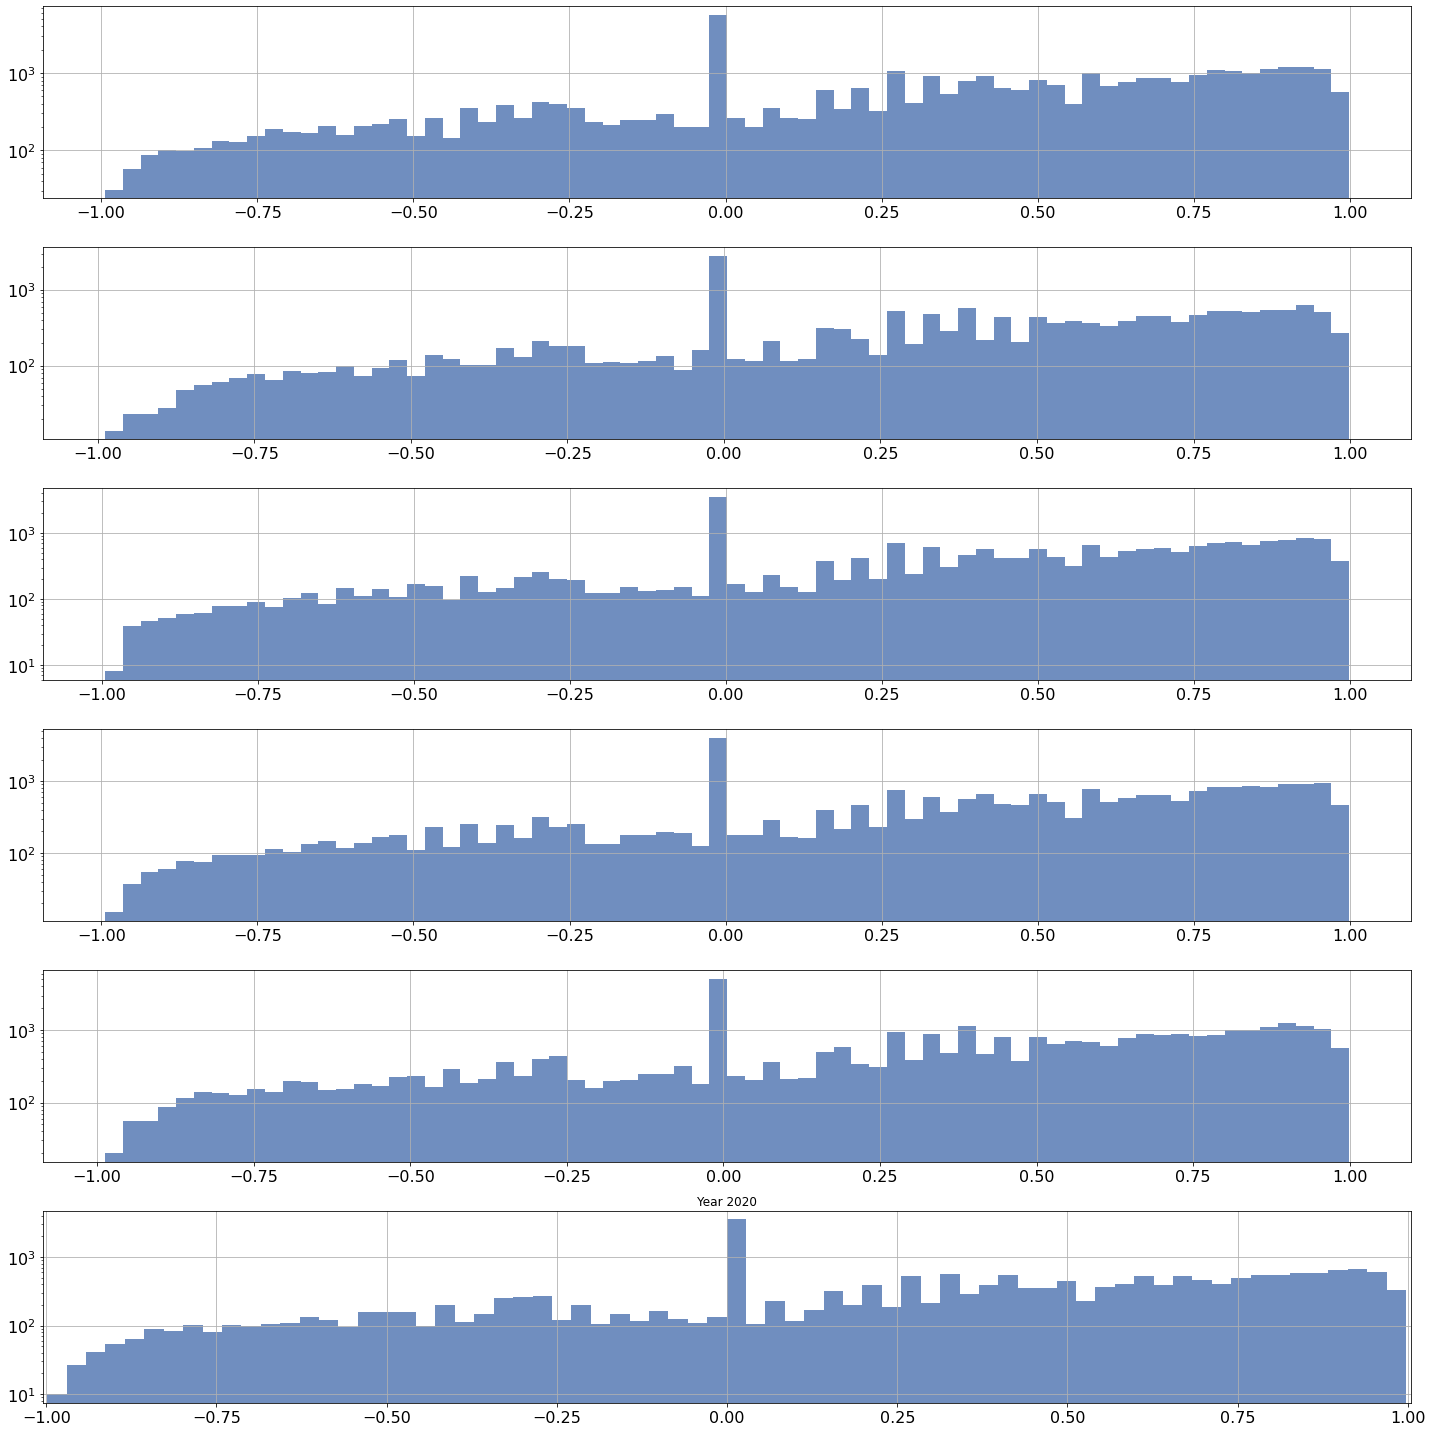

In [127]:
fig, axs = plt.subplots(6,figsize=(20,20))
for i in range(6):
    s=str(2015+i)
    axs[i].hist(gw_sent[gw_sent['year']==s]['compound scores'],bins=70, alpha = 0.8)
    axs[i].grid()
    axs[i].set_yscale('log')
    plt.title('Year '+ s)
    
    # this controls the grid labels size
    axs[i].tick_params(axis='both', which='major', labelsize=16)

    # this makes the plot tight
    fig.tight_layout()
    plt.xlim([-1.005,1.005])
None

In [128]:
gw_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
year,,,,,,,,,
2015,37901,37901,37901,37901,37901,37901,37901,37901,37901
2016,18773,18773,18773,18773,18773,18773,18773,18773,18773
2017,24328,24328,24328,24328,24328,24328,24328,24328,24328
2018,27929,27929,27929,27929,27929,27929,27929,27929,27929
2019,35820,35820,35820,35820,35820,35820,35820,35820,35820
2020,21614,21614,21614,21614,21614,21614,21614,21614,21614
